# Simple pipeline example of ML using Perceptron
## Perceptron is the building block of many ML NN algorithms

In [ ]:
import platform as pt
import sys
import os
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import tensorflow as tf

# Perceptron imports and Decisoin Plotting
# install the followingfor the Plotting of the results
conda install -c conda-forge mlxtend

In [ ]:
from sklearn.linear_model import Perceptron
from mlxtend.plotting import plot_decision_regions

# Print statements to check the system

In [ ]:
%matplotlib
%matplotlib notebook
%matplotlib inline

print(pt.python_version())
print(sys.version)
print(sys.version_info)
print("TensorFlow version:", tf.__version__)
print(os.getcwd())

Using matplotlib backend: nbAgg
3.10.0
3.10.0 | packaged by conda-forge | (default, Nov 10 2021, 13:20:59) [MSC v.1916 64 bit (AMD64)]
sys.version_info(major=3, minor=10, micro=0, releaselevel='final', serial=0)
TensorFlow version: 2.8.2
C:\Users\xwc981


## Reading our data file csv. This one is almost ready to be trained...

In [ ]:
! type .\sms_spam_perceptron.csv

"type","sex","buy"
"ham","0","1"
"ham","0","1"
"ham","1","1"
"spam","1","0"
"ham","0","1"
"spam","1","0"
"ham","0","1"
"ham","0","1"
"spam","2","1"
"ham","0","1"
"ham","0","1"
"ham","0","1"
"ham","0","1"
"ham","0","1"
"spam","1","0"
"ham","0","1"
"ham","0","2"
"ham","0","1"
"spam","1","2"
"ham","0","1"
"spam","1","0"
"ham","0","1"
"spam","1","0"
"ham","0","1"
"spam","2","0"
"ham","0","1"
"spam","1","0"
"ham","0","2"
"spam","1","0"
"ham","0","2"
"ham","0","1"
"ham","0","1"
"ham","1","0"
"ham","0","1"
"spam","1","0"
"ham","0","1"
"ham","0","1"
"ham","0","1"
"spam","1","0"
"ham","0","1"
"ham","1","0"
"ham","0","1"
"ham","0","1"
"ham","0","1"
"spam","1","0"
"ham","0","1"
"ham","0","1"
"spam","1","0"
"spam","1","0"
"spam","1","0"
"ham","1","0"
"ham","0","2"
"ham","0","1"
"ham","0","1"
"ham","1","0"
"ham","0","1"
"ham","0","1"
"spam","1","0"
"ham","0","1"
"ham","0","1"
"ham","1","0"
"spam","2","0"
"ham","1","0"
"ham","1","0"
"ham","0","1"
"ham","0","1"
"ham","0","1"
"ham","1","0"
"spam","1",

In [ ]:
# Reading as csv with a header
df = pd.read_csv('./sms_spam_perceptron.csv')

# extract the label
y = df.iloc[:, 0].values

# convert the word spam to -1 and the word ham to +1
y = np.where(y == 'spam', -1, 1)

#pick the data without the label as X
X = df.iloc[:, [1, 2]].values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    99 non-null     object
 1   sex     99 non-null     int64 
 2   buy     99 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 2.4+ KB


In [ ]:
y

array([ 1,  1,  1, -1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,
        1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1, -1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1])

In [ ]:
df

,type,sex,buy
0,ham,0,1
1,ham,0,1
2,ham,1,1
3,spam,1,0
4,ham,0,1
...,...,...,...
94,ham,0,1
95,ham,0,1
96,ham,0,1
97,spam,1,0


In [ ]:
df

In [ ]:
y = df.iloc[:, 0].values

In [ ]:
y

array(['ham', 'ham', 'ham', 'spam', 'ham', 'spam', 'ham', 'ham', 'spam',
       'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham',
       'spam', 'ham', 'spam', 'ham', 'spam', 'ham', 'spam', 'ham', 'spam',
       'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham',
       'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam',
       'ham', 'ham', 'spam', 'spam', 'spam', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'spam', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'spam', 'ham', 'spam', 'ham', 'spam', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham'],
      dtype=object)

In [ ]:
type(y)

numpy.ndarray

In [ ]:
y = np.where(y == 'spam', -1, 1)

In [ ]:
y


array([ 1,  1,  1, -1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,
        1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1, -1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1])

In [ ]:
X = df.iloc[:, [1, 2]].values

In [ ]:
X

array([[0, 1],
       [0, 1],
       [1, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [2, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 2],
       [0, 1],
       [1, 2],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [2, 0],
       [0, 1],
       [1, 0],
       [0, 2],
       [1, 0],
       [0, 2],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 2],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [2, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0,

In [ ]:
type(X)

numpy.ndarray

# Splitting the data into Training and Testing

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.2, random_state=0)

In [ ]:
print(len(X_train))
print(len(X_test))

79
20


In [ ]:
X_train.shape

(79, 2)

In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
X_train.dtype

dtype('int64')

In [ ]:
y_train

array([ 1,  1, -1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1, -1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1, -1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1,
        1, -1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1])

In [ ]:
y_train.shape

(79,)

In [ ]:
y_train.dtype

dtype('int32')

In [ ]:
#clf = Perceptron(max_iter=40, eta0=0.1, random_state=0)
clf =Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
      fit_intercept=True, max_iter=40, n_iter_no_change=5,
      n_jobs=None, penalty=None, random_state=0, shuffle=True, tol=None,
      validation_fraction=0.1, verbose=0, warm_start=False)
clf.fit(X_train, y_train)

Perceptron(eta0=0.1, max_iter=40, tol=None)

In [ ]:
clf.score(X, y)
y_pred = p.predict(X_test)

In [ ]:
y_pred

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1, -1])

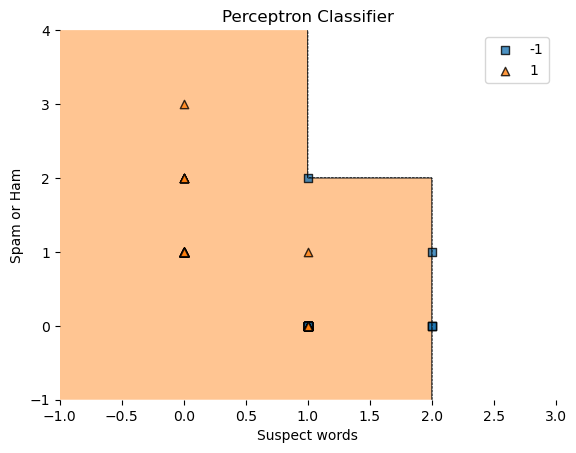

In [ ]:
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined, y=y_combined,clf=clf,legend=2)
# Adding axes annotations
plt.title('Perceptron Classifier')
plt.xlabel('Suspect words')
plt.ylabel('Spam or Ham')
plt.legend(loc='upper right')

#plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Misclassified samples: 4
Accuracy: 0.80


In [ ]:
# Import metrics from the sklearn module
from sklearn.metrics import confusion_matrix


In [ ]:
#Run the confusion matrix function on actual and predicted values
cm=confusion_matrix(y_test, y_pred,labels=p.classes_)

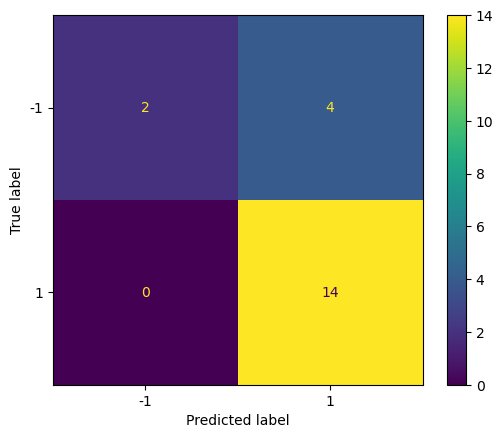

In [ ]:
# Plot the confusion matrix
import matplotlib.pyplot as plt
# from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
disp= ConfusionMatrixDisplay(cm, display_labels=p.classes_)
disp.plot()